In [1]:
import keras

Using TensorFlow backend.
/Users/phaniram/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
from keras.models import Sequential

In [3]:
from sklearn.cross_validation import train_test_split

/Users/phaniram/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
import os, random
import cv2
import pandas as pd

In [5]:
def getRandomFileOfDiffClass(path, file):
    files = os.listdir(path)
    randomFile = file 
    while (randomFile[:4] == file[:4]):
        index = random.randrange(0, len(files))
        randomFile = files[index]
    return randomFile

In [6]:
training_dataset = '/Users/phaniram/Downloads/AND_resized/training/'

In [7]:
files = os.listdir("/Users/phaniram/Downloads/AND_resized/training/")

In [8]:
global A_data
global B_data 
global C_data
#same class code is 0, diff class its 1
A_data = []
B_data = []
C_data = []

In [9]:
def labelDifferentClasses(files):
    for file in files:
        image_a = cv2.imread(training_dataset+file)
        #gray_image_a = cv2.cvtColor(image_a, cv2.COLOR_BGR2GRAY)
        small = cv2.resize(image_a, (0,0), fx=0.25, fy=0.25) 
        A_data.append(small)
        diff_file = getRandomFileOfDiffClass('/Users/phaniram/Downloads/AND_resized/training',file)
        image_b = cv2.imread(training_dataset+diff_file)
        #gray_image_b = cv2.cvtColor(image_b, cv2.COLOR_BGR2GRAY)
        small_b = cv2.resize(image_b, (0,0), fx=0.25, fy=0.25) 
        #cv2.imshow('image',small)
        #print(small.shape)
        #cv2.waitKey(0)
        B_data.append(small_b)
        C_data.append(1)
        #break
    

In [10]:
labelDifferentClasses(files)

In [11]:
B_data[1].shape

(64, 64, 3)

In [12]:
def getRandomFileOfSameClass(path, file):
    files = os.listdir(path)
    randomFile = file 
    sampleSet = []
    inFlag = 0
    for i in range(0, len(files)):
        if((files[i])[:4] == file[:4]):
            inFlag = 1
            sampleSet.append(files[i])
            #print(files[i])
        elif (inFlag == 1):
            break
    index = random.randrange(0, len(sampleSet))
    if (index >= 0):
        randomFile = sampleSet[index]
    return randomFile

In [13]:
def labelSameClasses(files):
    for file in files:
        image_a = cv2.imread(training_dataset+file)
        #gray_image_a = cv2.cvtColor(image_a, cv2.COLOR_BGR2GRAY)
        small = cv2.resize(image_a, (0,0), fx=0.25, fy=0.25)
        A0_data.append(small)
        
        diff_file = getRandomFileOfSameClass('/Users/phaniram/Downloads/AND_resized/training',file)
        image_b = cv2.imread(training_dataset+diff_file)
        #gray_image_b = cv2.cvtColor(image_b, cv2.COLOR_BGR2GRAY)
        small_b = cv2.resize(image_b, (0,0), fx=0.25, fy=0.25) 
        B0_data.append(small_b)
        C0_data.append(2)
        #same class label it as 2

In [14]:
#randomFile = getRandomFileOfSameClass('/Users/phaniram/Downloads/AND_resized/training','0011b_num3.png')

In [15]:
global A0_data
global B0_data 
global C0_data

#same class code is 0, diff class its 1
A0_data = []
B0_data = []
C0_data = []

In [16]:
labelSameClasses(files)

In [17]:
B0_data[1].shape

(64, 64, 3)

In [18]:
#labelDifferentClasses(files)

In [19]:
merged_C_data = C0_data + C_data
#first same class, followed by different class

In [20]:
merged_B_data = B0_data + B_data
#first same class, followed by different class

In [21]:
merged_A_data = A0_data + A_data
#first same class, followed by different class

In [22]:
#Now shuffle the labels
final_C_data = []
final_B_data = []
final_A_data = []

from random import shuffle
index_shuffle = range(len(merged_C_data))
index_shuffle = [[i] for i in range(len(merged_C_data))]
shuffle(index_shuffle)
for i in index_shuffle:
    #print (i[0])
    final_A_data.append(merged_A_data[i[0]])
    final_B_data.append(merged_B_data[i[0]])
    final_C_data.append(merged_C_data[i[0]])


In [23]:
# garbage collection
del merged_A_data
del merged_B_data
del merged_C_data
del C0_data
del C_data
del B0_data
del B_data
del A0_data
del A_data

In [24]:
len(final_C_data)

15534

In [25]:
#total 15534 rows ready to get trained

#Now the Training starts


In [74]:
import numpy as np
from keras.utils import np_utils
from keras.layers.core import Dense, Activation
from sklearn.cross_validation import train_test_split

def one_hot_encode_object_array(arr):
    '''One hot encode a numpy array of objects (e.g. strings)'''
    uniques, ids = np.unique(arr, return_inverse=True)
    #print (uniques)
    return np_utils.to_categorical(ids, len(uniques))

In [75]:
#partition test and train data 
length = int(len(final_A_data)/2)
#type(length)
train_A_data = final_A_data[:length]
test_A_data = final_A_data[length:]
train_B_data = final_B_data[:length]
test_B_data = final_B_data[length:]
train_C_data = final_C_data[:length]
test_C_data = final_C_data[length:]

NameError: name 'final_A_data' is not defined

In [28]:
train_labels_C = one_hot_encode_object_array(train_C_data)
test_labels_C = one_hot_encode_object_array(test_C_data)

In [29]:
#Building CNN here

In [30]:
from keras.models import Model # basic class for specifying and training a neural network
from keras.layers import Input, Convolution2D, MaxPooling2D, Dense, Dropout, Flatten

In [76]:
batch_size = 32 # in each iteration, we consider 32 training examples at once
num_epochs = 50 # we iterate 50 times over the entire training set
kernel_size = 3 # we will use 3x3 kernels throughout
pool_size = 2 # we will use 2x2 pooling throughout
conv_depth_1 = 32 # we will initially have 32 kernels per conv. layer...
conv_depth_2 = 64 # now to 64 after the first pooling layer
drop_prob_1 = 0.25 # not using right now
drop_prob_2 = 0.25 # not using right now
hidden_size = 512 # the FC layer will have 512 neurons

In [32]:
#converting everting into numpy arrays
train_A = np.asarray(train_A_data)
train_B = np.asarray(train_B_data)
train_C = np.asarray(train_labels_C)
test_C = np.asarray(test_labels_C)

In [33]:
train_A.shape

(7767, 64, 64, 3)

In [34]:
test_A = np.asarray(test_A_data)
test_B = np.asarray(test_B_data)

In [35]:
#garbage collection 
del train_A_data
del test_A_data
del train_B_data
del test_B_data
del train_C_data
del test_C_data
del train_labels_C
del test_labels_C
del final_A_data
del final_B_data
del final_C_data

In [36]:
num_train, height, width, depth = train_A.shape

In [37]:
train_B.shape


(7767, 64, 64, 3)

In [38]:
num_classes = np.unique(train_C).shape[0]
num_classes

2

In [39]:
#normalizing data
train_A = train_A.astype('float32')
test_A = test_A.astype('float32')
train_B = train_B.astype('float32')
test_B = test_B.astype('float32')

In [40]:
train_A /= np.max(train_A) # Normalise data to [0, 1] range
test_A /= np.max(test_A) # Normalise data to [0, 1] range
train_B /= np.max(train_B) # Normalise data to [0, 1] range
test_B /= np.max(test_B) # Normalise data to [0, 1] range

In [41]:
import gc
gc.collect()

137

In [77]:
inp_A = Input(shape=(height, width, depth))


In [78]:
def useSameCNN(inp):
    #inp = Input(shape=(height, width, depth))
    conv_1 = Convolution2D(conv_depth_1, (kernel_size, kernel_size), padding='same', activation='relu')(inp)
    conv_2 = Convolution2D(conv_depth_1, (kernel_size, kernel_size), padding='same', activation='relu')(conv_1)
    #pool_1_B = conv_2_B
    pool_1 = MaxPooling2D(pool_size=(pool_size, pool_size))(conv_2)
    #drop_1_B = pool_1_B
    #drop_1 = Dropout(drop_prob_1)(pool_1)
    drop_1 = pool_1
    conv_3 = Convolution2D(conv_depth_2, (kernel_size, kernel_size), padding='same', activation='relu')(drop_1)
    conv_4 = Convolution2D(conv_depth_2, (kernel_size, kernel_size), padding='same', activation='relu')(conv_3)
    #pool_2_B = conv_4_B
    pool_2 = MaxPooling2D(pool_size=(pool_size, pool_size))(conv_4)
    
    # drop_2_B = Dropout(drop_prob_1)(pool_2_B)
    #drop_2_B = pool_2_B
    flat = Flatten()(pool_2)
    return flat
    
    

In [79]:
flat1 = useSameCNN(inp_A)

#Another CNN

In [80]:
inp_B = Input(shape=(height, width, depth))
flat2 = useSameCNN(inp_B)

In [81]:
type(flat2)


tensorflow.python.framework.ops.Tensor

In [82]:
#flat = flat1+flat2
#flat = keras.layers.Add()([flat1, flat2])
from keras.layers import Concatenate, concatenate
flat = concatenate([flat1, flat2])


In [83]:
hidden1 = Dense(hidden_size, activation='relu')(flat)

In [84]:
hidden1.shape

TensorShape([Dimension(None), Dimension(512)])

In [85]:
hidden2 = Dense(hidden_size, activation='relu')(hidden1)
hidden3 = Dense(hidden_size, activation='relu')(hidden2)
hidden4 = Dense(hidden_size, activation='relu')(hidden3)
hidden5 = Dense(hidden_size, activation='relu')(hidden4)
hidden6 = Dense(hidden_size, activation='relu')(hidden5)
hidden7 = Dense(hidden_size, activation='relu')(hidden6)
hidden8 = Dense(hidden_size, activation='relu')(hidden7)
hidden9 = Dense(hidden_size, activation='relu')(hidden8)
hidden10 = Dense(hidden_size, activation='relu')(hidden9)
hidden11 = Dense(hidden_size, activation='relu')(hidden10)
hidden12 = Dense(hidden_size, activation='relu')(hidden11)
hidden13 = Dense(hidden_size, activation='relu')(hidden12)
hidden14 = Dense(hidden_size, activation='relu')(hidden13)
hidden15 = Dense(hidden_size, activation='relu')(hidden14)
hidden16 = Dense(hidden_size, activation='relu')(hidden15)

In [86]:
#drop_3 = Dropout(drop_prob_2)(hidden3)
drop_3 = hidden4
out = Dense(num_classes, activation='softmax')(drop_3)

In [87]:
model = Model(inputs=[inp_A, inp_B], outputs=out) # To define a model, just specify its input and output layers

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_9 (Conv2D)               (None, 64, 64, 32)   896         input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_13 (Conv2D)              (None, 64, 64, 32)   896         input_4[0][0]                    
__________________________________________________________________________________________________
conv2d_10 

In [88]:
model.compile(loss='categorical_crossentropy', # using the cross-entropy loss function
              optimizer='sgd', # using the Sgd optimiser
              metrics=['accuracy'])

In [92]:
hist = model.fit([train_A, train_B], train_C,                # Train the model using the training set...
          batch_size=batch_size, epochs=num_epochs,
          verbose=1, validation_split=0.0) # ...holding out 10% of the data for validation

Epoch 1/50
7767/7767 [==============================] - 541s 70ms/step - loss: 0.6937 - acc: 0.5030
Epoch 2/50
7767/7767 [==============================] - 525s 68ms/step - loss: 0.6935 - acc: 0.5016
Epoch 3/50
7767/7767 [==============================] - 500s 64ms/step - loss: 0.6933 - acc: 0.5055
Epoch 4/50
7767/7767 [==============================] - 540s 70ms/step - loss: 0.6931 - acc: 0.5082
Epoch 5/50
7767/7767 [==============================] - 503s 65ms/step - loss: 0.6929 - acc: 0.5115
Epoch 6/50
7767/7767 [==============================] - 551s 71ms/step - loss: 0.6922 - acc: 0.5221
Epoch 7/50
7767/7767 [==============================] - 527s 68ms/step - loss: 0.6917 - acc: 0.5351
Epoch 8/50
7767/7767 [==============================] - 519s 67ms/step - loss: 0.6902 - acc: 0.5534
Epoch 9/50
7767/7767 [==============================] - 496s 64ms/step - loss: 0.6877 - acc: 0.5798
Epoch 10/50
7767/7767 [==============================] - 786s 101ms/step - loss: 0.6814 - acc: 0.614

KeyboardInterrupt: 

In [301]:
flat.shape

TensorShape([Dimension(None), Dimension(None)])

In [93]:
model.evaluate([test_A, test_B], test_C, verbose=1)

7767/7767 [==============================] - 162s 21ms/step


[1.3156846069040271, 0.67027166219879275]

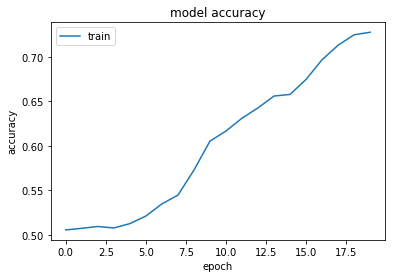

In [70]:
import matplotlib.pyplot as plt

plt.plot(hist.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

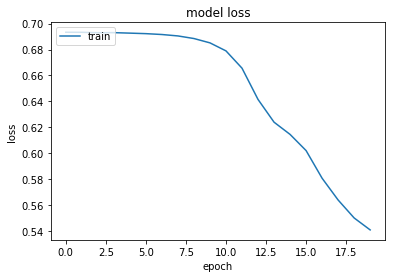

In [73]:
# summarize history for loss
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

ImportError: Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.

ImportError: Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.